In [1]:
from json import loads
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd
import json
import numpy as np


In [2]:
POSTS_PATH = "../../2.NerSaLang/Post_Analysis.json"
POST_PATH = "../SaNerGoodClusters.json"

In [3]:
df = pd.read_csv('GoodClusters.csv')  # Replace 'your_data.csv' with your actual file path

# Separate data by class label
cl0_ids = df[df['Cluster Label'] == -1][['Image ID']].values.tolist()
cl1_ids = df[df['Cluster Label'] == 0][['Image ID']].values.tolist()
cl2_ids = df[df['Cluster Label'] == 1][['Image ID']].values.tolist()
cl0_ids = [item for sublist in cl0_ids for item in sublist]
cl1_ids = [item for sublist in cl1_ids for item in sublist]
cl2_ids = [item for sublist in cl2_ids for item in sublist]
cl0 = []
cl1 = []
cl2 = []
with open(POSTS_PATH, 'r') as input_file:
    for line in input_file:
        post = json.loads(line)
        if post["_id"] in cl0_ids:
            cl0.append(post)
        elif post["_id"] in cl1_ids:
            cl1.append(post)
        elif post["_id"] in cl2_ids:
            cl2.append(post)


In [4]:
ner = []
per = []
org = []
misc = []
loc = []
with open(POST_PATH, 'r') as post_file:
    for post in cl1:

        for l in post["ner"].keys():
            if l == "PER":
                ner = ner + post["ner"][l]
                per = per + post["ner"][l]
            elif l == "ORG":
                ner = ner + post["ner"][l]
                org = org + post["ner"][l]
            elif l == "MISC":
                ner = ner + post["ner"][l]
                misc = misc + post["ner"][l]
            elif l == "LOC":
                ner = ner + post["ner"][l]
                loc = loc + post["ner"][l]
            else:
                print(l)


# Ner


In [5]:
print(len(set(ner)))
print(len(set(per)))
print(len(set(org)))
print(len(set(misc)))
print(len(set(loc)))


7358
1512
1065
3598
1433


In [6]:
print(len(ner))
print(len(per))
print(len(org))
print(len(misc))
print(len(loc))


29824
5247
3439
15227
5911


In [7]:
ner_count = Counter(ner)
per_count = Counter(per)
org_count = Counter(org)
misc_count = Counter(misc)
loc_count = Counter(loc)

In [8]:
for pol, count in ner_count.most_common(10):
    print(f"{pol}: {count}")

Dios: 822
NoAlAborto: 746
nofueley #feminazi #: 520
️: 510
Cristo: 432
Jesús: 406
Perú: 398
Peru: 384
NoalComunismo #: 375
RenovacionPopular: 374


In [9]:
for pol, count in per_count.most_common(10):
    print(f"{pol}: {count}")

Cristo: 432
Jesús: 406
Jesus: 270
Jesucristo: 254
Noalaborto: 204
jesus: 173
Señor: 115
María: 73
Padre: 72
Abortonuncamas: 62


In [10]:
for pol, count in org_count.most_common(10):
    print(f"{pol}: {count}")

NoAlAborto: 746
FueraCastillo: 203
RafaelLopezAliaga: 99
Iglesia: 55
VIDA: 45
NadieMenos: 40
SI SI SI A LA: 38
ProyectoAngel: 33
ABORTO: 32
IglesiaCatolica: 30


In [11]:
for pol, count in misc_count.most_common(11):
    print(f"{pol}: {count}")

Dios: 822
nofueley #feminazi #: 520
️: 510
NoalComunismo #: 375
RenovacionPopular: 374
NuevoOrdenMundial #Noalnuevoordenmundial: 368
AgustinLaje: 364
sanjuanpabloII #: 278
NoalNom: 270
ProVida: 259
ReaccionaPerú: 250


In [12]:
for pol, count in loc_count.most_common(10):
    print(f"{pol}: {count}")

Perú: 398
Peru: 384
VacanciaPedroCastillo: 277
mexico: 234
Provida: 125
colombia: 100
ReaccionaPeru: 96
El Perú: 82
San José: 78
Guadalajara: 64


# PIECHARTs con %

In [13]:
ner_count.keys()

dict_keys(['Rockefeller', '💚 #', '🌻', 'papaymama #', 'Protomártir', 'Cristo', 'Jesus', 'Jesucristo', 'Iglesia', '🕊️ San Esteban', '️', 'Dios', 'sanjuanpabloII #', 'catholic #', 'los Apóstoles', 'c4br0n', 'nofueley #feminazi #', 'Buro-Chan', 'universidad de Chile', 'Repost', 'U de Chile', 'LaCiencia', 'AmericaLatina', 'NoAlAborto', 'FeminidadBiblica', '️ 𝐸́𝑙', '️ Síguenos', 'PasionVida #', 'DiosCreador #ADNDeDios #Fecundación #', 'SerHumano', 'Entrenamiento #', '𝐃𝐢𝐨𝐬.', 'Lavida', 'VIDA', 'ProVida', 'OlaCeleste', 'MedicosPorLaVida', 'SunchalesPorLaVida #Navidad', '🎁', '️▫️', 'Amor de Dios', '𝒆𝒔𝒕𝒂𝒔 𝒏𝒂𝒗𝒊𝒅𝒂𝒅𝒆𝒔', '✨ 𝑷𝒂𝒔𝒊𝒐𝒏𝑽𝒊𝒅𝒂', '𝒆𝒍', '𝑱𝒆𝒔𝒖𝒄𝒓𝒊𝒔𝒕𝒐 ⭐️', 'Especial💙💫\nLes deseamos una \nHERMOSA', 'Dios los Bendiga!', 'Feliz Navidad', 'Jesús', 'Francisco de Asís', 'Francisco', 'San Lucas', 'Señor', 'Él', 'Rey', 'Padre', 'Juan', 'Niñito Jesús', 'Navidad', '️ _El mundo no recibió', 'Su casa', 'Eucaristía', 'San Francisco', 'Greccio-Italia', 'Ángel del Gran Consejo', 'Isaías', '🕯️ Tiempo de', 'Magni

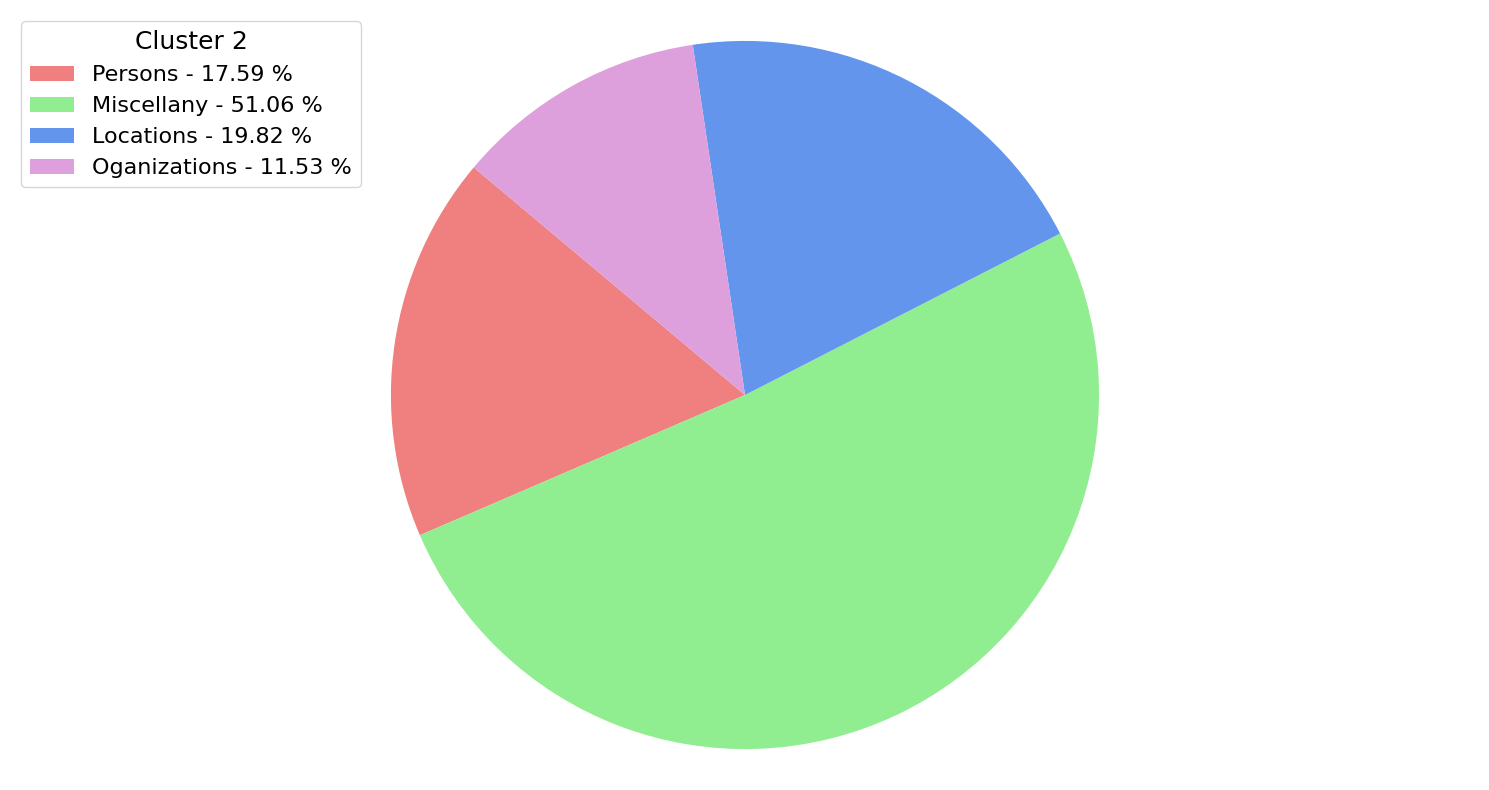

In [15]:
import numpy as np
labels = ["Persons", "Miscellany", "Locations", "Oganizations"]#ner_count.keys()
counts = np.array([float(len(per)), float(len(misc)), float(len(loc)), float(len(org))])#ner_count.values()



colors = ['lightcoral', 'lightgreen', 'cornflowerblue', 'plum'] 

#patches, texts = plt.pie(counts, colors=colors, startangle=90, radius=1.2)
porcent = 100.*counts/counts.sum()
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(labels, porcent)]

# Create the pie chart

plt.figure(figsize=(15, 8))
plt.pie(counts, startangle=140, colors=colors, labeldistance=1.10)
plt.title("",fontsize=18)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
legend = plt.legend(labels, title="Cluster 2", loc="upper left",fontsize=16)
legend.get_title().set_fontsize(18)
# Display the pie chart
plt.tight_layout()
plt.show()
